#### Importing helper functions to be used:

In [1]:
import helpers
from helpers.functions import *

#### Creating dorectory to save plots:

In [2]:
try:
    os.makedirs(PLOTS_PATH)
except OSError as error:
    print(error)

[WinError 183] Cannot create a file when that file already exists: '../data/plots'


#### Loading the data:

In [3]:
blood_data = load_from_files(get_files(PATH, BLOOD_FILENAME_STRING, FILENAME_RULE))
saline_data = load_from_files(get_files(PATH, SALINE_FILENAME_STRING, FILENAME_RULE))

#### Extracting the properties of the samples from the data:

In [4]:
saline_frequency, saline_frequency_mean = get_property(saline_data, "Frequency (Hz)")
saline_resistance, saline_resistance_mean = get_property(saline_data, "Z' (Ω)")
saline_reactance, saline_reactance_mean = get_property(saline_data, "-Z'' (Ω)")

blood_frequency, blood_frequency_mean = get_property(blood_data, "Frequency (Hz)")
blood_resistance, blood_resistance_mean = get_property(blood_data, "Z' (Ω)")
blood_reactance, blood_reactance_mean = get_property(blood_data, "-Z'' (Ω)")

#### Overview of the data plots:

(<Figure size 576x360 with 1 Axes>,
 <AxesSubplot:xlabel='Frequency (Hz)', ylabel="Z' (Ω)">)

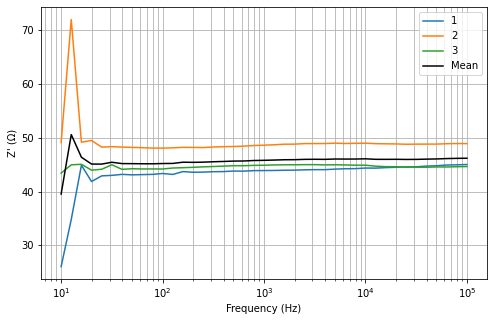

In [5]:
plot_sample_property(saline_data, "Z' (Ω)", "Frequency (Hz)", [1, 2, 3, "Mean"])

(<Figure size 576x360 with 1 Axes>,
 <AxesSubplot:xlabel='Frequency (Hz)', ylabel="-Z'' (Ω)">)

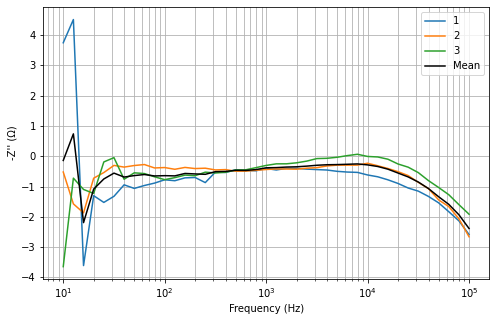

In [6]:
plot_sample_property(saline_data, "-Z'' (Ω)", "Frequency (Hz)", [1, 2, 3, "Mean"])

(<Figure size 576x360 with 1 Axes>,
 <AxesSubplot:xlabel='Frequency (Hz)', ylabel="Z' (Ω)">)

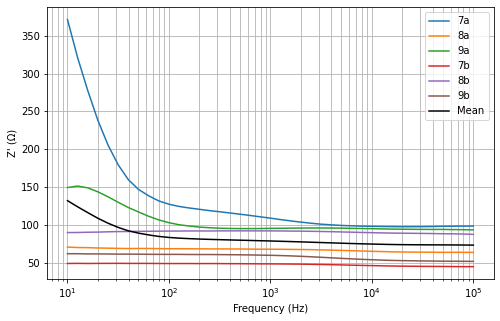

In [7]:
plot_sample_property(blood_data, "Z' (Ω)", "Frequency (Hz)", ["7a", "8a", "9a", "7b", "8b", "9b", "Mean"])

(<Figure size 576x360 with 1 Axes>,
 <AxesSubplot:xlabel='Frequency (Hz)', ylabel="-Z'' (Ω)">)

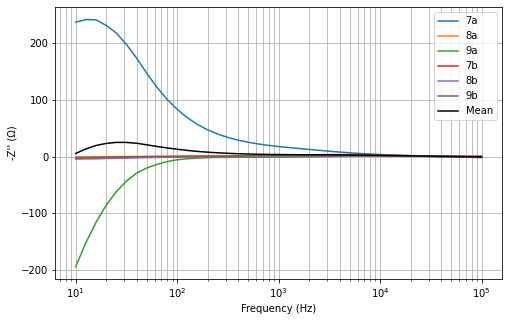

In [8]:
plot_sample_property(blood_data, "-Z'' (Ω)", "Frequency (Hz)", ["7a", "8a", "9a", "7b", "8b", "9b", "Mean"])

#### Calculating the cell constant:

In [9]:
k = calculate_cell_constant(saline_frequency_mean, saline_resistance_mean, saline_reactance_mean,
                            SALINE_01M_RELATIVE_PERMITTIVITY, SALINE_01M_CONDUCTIVITY)

#### Plotting the cell constant:

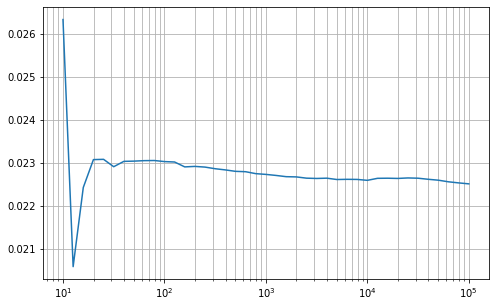

In [10]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.set(xscale="log", yscale="linear")
plt.grid(True, which="both")
ax.plot(saline_frequency_mean, k)

#### Calculating the blood conductivity:

In [11]:
blood_conductivity = calculate_conductivity(k, blood_resistance, blood_reactance)
blood_conductivity_mean = np.array(blood_conductivity).mean(axis=0)

#### Plotting the blood conductivity:

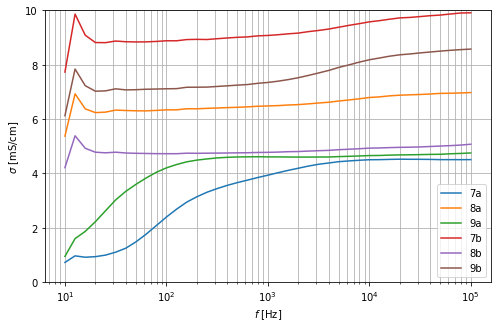

In [12]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.set(xscale="log", yscale="linear")
plt.grid(True, which="both")

for i in range(len(blood_conductivity)):
    ax.plot(blood_frequency_mean, blood_conductivity[i])

ax.set_ylabel(r"$\sigma$ [mS/cm]")
ax.set_xlabel(r"$f$ [Hz]")
ax.legend(["7a", "8a", "9a", "7b", "8b", "9b", ])
ax.set_ylim([0, 10])
fig.savefig(os.path.join(PLOTS_PATH, "blood.png"), dpi=300)

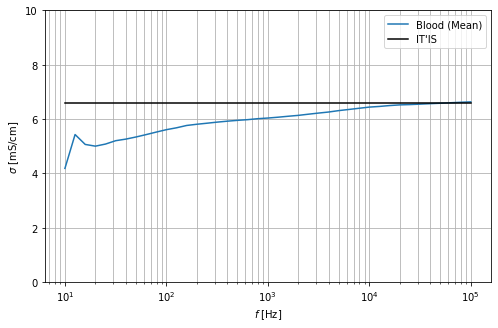

In [13]:
GABRIEL = 6.6
fig, ax = plt.subplots(figsize=(8, 5))
ax.set(xscale="log", yscale="linear")
plt.grid(True, which="both")
ax.plot(blood_frequency_mean, blood_conductivity_mean, [1e1, 1e5], [GABRIEL, GABRIEL], 'k-')
ax.set_ylabel(r"$\sigma$ [mS/cm]")
ax.set_xlabel(r"$f$ [Hz]")
ax.legend(["Blood (Mean)", "IT'IS"])
ax.set_ylim([0, 10])
fig.savefig(os.path.join(PLOTS_PATH, "blood_mean.png"), dpi=300)

In [14]:
healthy_blood_conductivity_array = np.asarray(blood_conductivity[:3])
neutropenic_blood_conductivity_array = np.asarray(blood_conductivity[3:])

healthy_blood_conductivity_std = np.std(healthy_blood_conductivity_array, axis=0)
neutropenic_blood_conductivity_std = np.std(neutropenic_blood_conductivity_array, axis=0)

healthy_blood_conductivity_mean = np.mean(healthy_blood_conductivity_array, axis=0)
neutropenic_blood_conductivity_mean = np.mean(neutropenic_blood_conductivity_array, axis=0)


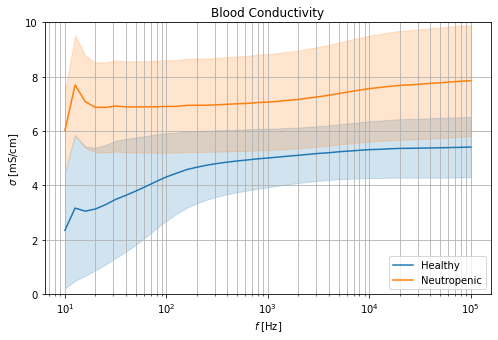

In [15]:
fig, ax = plot_mean_and_std([blood_frequency_mean, blood_frequency_mean],
                            [healthy_blood_conductivity_mean, neutropenic_blood_conductivity_mean],
                            [healthy_blood_conductivity_std, neutropenic_blood_conductivity_std],
                            ['tab:blue', 'tab:orange'])



ax.set_ylim([0, 10])
ax.set_ylabel(r"$\sigma$ [mS/cm]")
ax.set_xlabel(r"$f$ [Hz]")
title = "Blood Conductivity"
labels = ["Healthy", "Neutropenic"]

ax.set_title(title)
ax.legend(labels, loc='lower right')

plt.savefig(os.path.join(PLOTS_PATH, 'blood_1-2.png'), dpi=300)

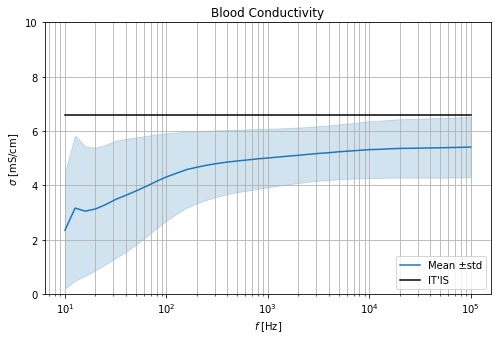

In [16]:

fig, ax = plot_mean_and_std([blood_frequency_mean],
                            [healthy_blood_conductivity_mean],
                            [healthy_blood_conductivity_std],
                            ['tab:blue'])



ax.set_ylim([0, 10])
ax.set_ylabel(r"$\sigma$ [mS/cm]")
ax.set_xlabel(r"$f$ [Hz]")
title = "Blood Conductivity"

ax.plot([1e1, 1e5], [GABRIEL, GABRIEL], 'k-')

labels = ["Mean ±std", "IT'IS"]

ax.set_title(title)
ax.legend(labels, loc='lower right')

plt.savefig(os.path.join(PLOTS_PATH, 'healthy_blood.png'), dpi=300)

#### Plots for the paper:

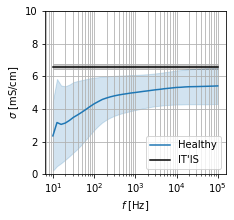

In [19]:
itis_std = 1.39E-1
itis_min = 4.33E-1
itis_max = 9.46E-1

fig, ax = plot_mean_and_std([blood_frequency_mean, np.asarray((1e1, 1e5))],
                            [healthy_blood_conductivity_mean, [GABRIEL, GABRIEL]],
                            [healthy_blood_conductivity_std, np.asarray((itis_std, itis_std))],
                            ['tab:blue', 'k'])
fig.set_size_inches(3.25, 3)

ax.set_ylim([0, 10])
ax.set_ylabel(r"$\sigma$ [mS/cm]")
ax.set_xlabel(r"$f$ [Hz]")
title = "Blood Conductivity"

#ax.plot([1e1, 1e5], [GABRIEL, GABRIEL], 'k-')

labels = ["Healthy", "IT'IS"]

# ax.set_title(title)
ax.legend(labels, loc='lower right')

plt.savefig(os.path.join(PLOTS_PATH, 'eucap_healthy_blood.png'), dpi=300)

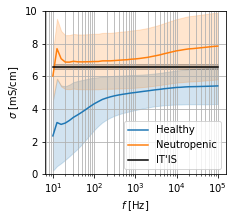

In [21]:
fig, ax = plot_mean_and_std([blood_frequency_mean, blood_frequency_mean, np.asarray((1e1, 1e5))],
                            [healthy_blood_conductivity_mean, neutropenic_blood_conductivity_mean, [GABRIEL, GABRIEL]],
                            [healthy_blood_conductivity_std, neutropenic_blood_conductivity_std, np.asarray((std_itis, std_itis))],
                            ['tab:blue', 'tab:orange', 'k'])

fig.set_size_inches(3.25, 3)


ax.set_ylim([0, 10])
ax.set_ylabel(r"$\sigma$ [mS/cm]")
ax.set_xlabel(r"$f$ [Hz]")
title = "Blood Conductivity"
labels = ["Healthy", "Neutropenic", "IT'IS"]

#ax.set_title(title)
ax.legend(labels, loc='lower right')

plt.savefig(os.path.join(PLOTS_PATH, 'eucap_blood_healthy_neutropenic.png'), dpi=300)

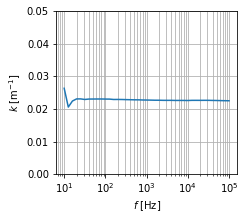

In [28]:
fig, ax = plt.subplots(figsize=(3.25, 3))
ax.set_ylim([0, 0.05])

ax.set(xscale="log", yscale="linear")
ax.set_ylabel(r"$k$ [m$^{-1}$]")
ax.set_xlabel(r"$f$ [Hz]")
plt.grid(True, which="both")
ax.plot(saline_frequency_mean, k)

plt.savefig(os.path.join(PLOTS_PATH, 'eucap_cell_constant.png'), dpi=300)
